# AudioChunker con AudioSegment (Pydub)

## Ejemplo de AudioSegment de Pydub

In [ ]:
from pydub import AudioSegment

path = "C:/Users/Asus/OneDrive/Escritorio/MapaDeVoces/AudioChunker/Crudos/E25_crudo.wav"
audio = AudioSegment.from_mp3(path)

end =  7.75 * 1000
start = 5.48 * 1000
first_10_seconds = audio[:end]
hola = first_10_seconds[start:]

hola.export("E25_crudo_chunk{i}.wav", format="wav")

## AudioChunker (Funciona)

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyAudioAnalysis\audioBasicIO.py:99: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_rate, signal = wavfile.read(input_file) # from scipy.io


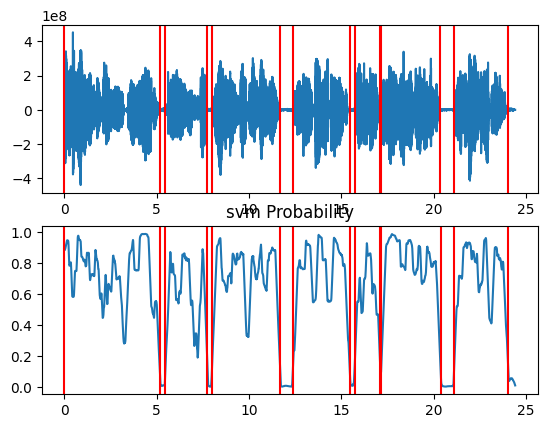

[[0.0, 5.17], [5.48, 7.75], [8.0, 11.68], [12.38, 15.450000000000001], [15.72, 17.11], [17.16, 20.37], [21.11, 24.03]]


In [11]:
from pyAudioAnalysis import audioBasicIO as aIO
from pyAudioAnalysis import audioSegmentation as aS

path = 'C:/Users/Asus/OneDrive/Escritorio/MapaDeVoces/AudioChunker/Crudos/E25_crudo.wav'
[Fs, x] = aIO.read_audio_file(path)
segments = aS.silence_removal(
    x, 
    Fs, 
    0.05, 
    0.01, 
    smooth_window = 0.3, 
    weight = 0.1,
    plot = True
)

print(segments)

from pydub import AudioSegment

def AudioTrimmer(path,segments):
    i=1
    for seg in segments:
        audio = AudioSegment.from_mp3(path)
        start = seg[0] * 1000
        end =  seg[1] * 1000
        audio = audio[:end]
        audio = audio[start:]
        audio.export(f"E25_crudo_chunk{i}.wav", format="wav")
        i+=1

AudioTrimmer(path,segments)

# Pasado a limpio

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyAudioAnalysis\audioBasicIO.py:99: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_rate, signal = wavfile.read(input_file) # from scipy.io


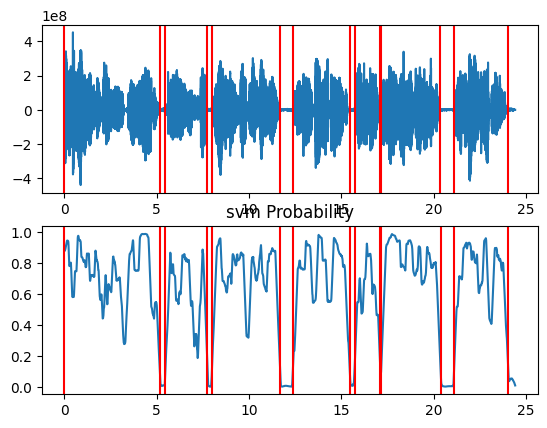

Success : audio file has been saved to "C:\Users\Asus\OneDrive\Escritorio\MapaDeVoces\AudioChunker\E25_crudo_chunk1.wav".
Success : audio file has been saved to "C:\Users\Asus\OneDrive\Escritorio\MapaDeVoces\AudioChunker\E25_crudo_chunk2.wav".
Success : audio file has been saved to "C:\Users\Asus\OneDrive\Escritorio\MapaDeVoces\AudioChunker\E25_crudo_chunk3.wav".
Success : audio file has been saved to "C:\Users\Asus\OneDrive\Escritorio\MapaDeVoces\AudioChunker\E25_crudo_chunk4.wav".
Success : audio file has been saved to "C:\Users\Asus\OneDrive\Escritorio\MapaDeVoces\AudioChunker\E25_crudo_chunk5.wav".
Success : audio file has been saved to "C:\Users\Asus\OneDrive\Escritorio\MapaDeVoces\AudioChunker\E25_crudo_chunk6.wav".
Success : audio file has been saved to "C:\Users\Asus\OneDrive\Escritorio\MapaDeVoces\AudioChunker\E25_crudo_chunk7.wav".


In [1]:
from pyAudioAnalysis import audioBasicIO as aIO
from pyAudioAnalysis import audioSegmentation as aS

path = 'C:/Users/Asus/OneDrive/Escritorio/MapaDeVoces/AudioChunker/Crudos/E25_crudo.wav'
[Fs, x] = aIO.read_audio_file(path)
segments = aS.silence_removal(
    x, 
    Fs, 
    0.05, 
    0.01, 
    smooth_window = 0.3, 
    weight = 0.1,
    plot = True
)

def NumToTime_StartTime(segments):
    ST = []
    for i in range(len(segments)):
        start_time = str(int(round(segments[i][0],0)))
        if len(start_time)==1:
            start_time = '00:0'+start_time
            ST.append(start_time)
        elif len(start_time)==2:
            start_time = '00:'+start_time
            ST.append(start_time)
    return ST

from audio_extract import extract_audio

ST = NumToTime_StartTime(segments)

for i in range(len(segments)):
    duration = segments[i][1]-segments[i][0]
    extract_audio(
        input_path = f'C:/Users/Asus/OneDrive/Escritorio/MapaDeVoces/AudioChunker/Crudos/E25_crudo.wav',
        output_path = f'C:/Users/Asus/OneDrive/Escritorio/MapaDeVoces/AudioChunker/E25_crudo_chunk{i+1}.wav',
        start_time=ST[i],
        duration=duration,
        output_format='wav'
        )

In [2]:
print(segments)

[[0.0, 5.17], [5.48, 7.75], [8.0, 11.68], [12.38, 15.450000000000001], [15.72, 17.11], [17.16, 20.37], [21.11, 24.03]]


In [3]:
def NumToTime_StartTime(segments):
    ST = []
    for i in range(len(segments)):
        start_time = str(int(round(segments[i][0],0)))
        if len(start_time)==1:
            start_time = '00:0'+start_time
            ST.append(start_time)
        elif len(start_time)==2:
            start_time = '00:'+start_time
            ST.append(start_time)
    return ST

print(NumToTime_StartTime(segments))


['00:00', '00:05', '00:08', '00:12', '00:16', '00:17', '00:21']


In [6]:
from audio_extract import extract_audio

extract_audio(input_path="C:/Users/Asus/OneDrive/Escritorio/MapaDeVoces/AudioChunker/Crudos/E25_crudo.wav",
              output_path="C:/Users/Asus/OneDrive/Escritorio/MapaDeVoces/AudioChunker/recorte.wav",
              start_time="00:05.15",
              output_format='wav',
              duration=5.0)

Exception: Invalid time format. Must be in HH:MM:SS or MM:SS format.

In [8]:
from audio_extract import extract_audio

print(segments)
ST = NumToTime_StartTime(segments)
print(ST)

for i in range(len(segments)):
    duration = segments[i][1]-segments[i][0]
    print(duration)
    # extract_audio(
    #     input_path = f'C:/Users/Asus/OneDrive/Escritorio/MapaDeVoces/AudioChunker/Crudos/E25_crudo.wav',
    #     output_path = f'C:/Users/Asus/OneDrive/Escritorio/MapaDeVoces/AudioChunker/E25_crudo_chunk{i+1}.wav',
    #     start_time=ST[i],
    #     duration=duration,
    #     output_format='wav'
    #     )

[[0.0, 5.17], [5.48, 7.75], [8.0, 11.68], [12.38, 15.450000000000001], [15.72, 17.11], [17.16, 20.37], [21.11, 24.04]]
['00:00', '00:05', '00:08', '00:12', '00:16', '00:17', '00:21']
5.17
2.2699999999999996
3.6799999999999997
3.0700000000000003
1.3899999999999988
3.210000000000001
2.9299999999999997


# Desarrollo

In [167]:
from pyAudioAnalysis import audioBasicIO as aIO
from pyAudioAnalysis import audioSegmentation as aS

In [168]:
path = 'C:/Users/Asus/OneDrive/Escritorio/MapaDeVoces/AudioChunker/Crudos/E25_crudo.wav'
[Fs, x] = aIO.read_audio_file(path)
segments = aS.silence_removal(
    x, 
    Fs, 
    0.05, 
    0.01, 
    smooth_window = 0.3, 
    weight = 0.1,
    plot = False
)
print(segments)

import numpy as np
print(np.floor(np.dot(Fs,segments)))

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyAudioAnalysis\audioBasicIO.py:99: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_rate, signal = wavfile.read(input_file) # from scipy.io


[[0.0, 5.17], [5.48, 7.75], [8.0, 11.68], [12.38, 15.450000000000001], [15.72, 17.11], [17.16, 20.37], [21.11, 24.03]]
[[     0. 113998.]
 [120834. 170887.]
 [176400. 257544.]
 [272979. 340672.]
 [346626. 377275.]
 [378378. 449158.]
 [465475. 529861.]]


C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyAudioAnalysis\audioBasicIO.py:99: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_rate, signal = wavfile.read(input_file) # from scipy.io


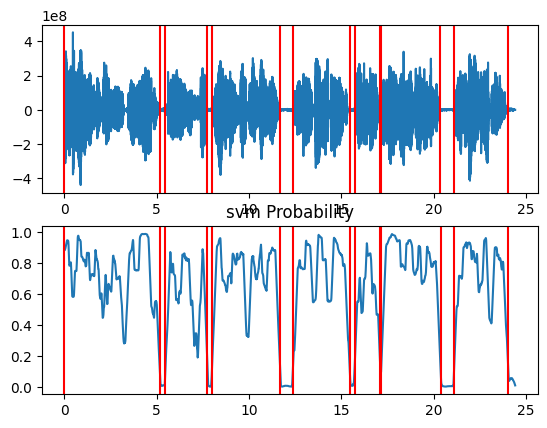

[[0.0, 5.17], [5.48, 7.75], [8.0, 11.68], [12.38, 15.450000000000001], [15.72, 17.11], [17.16, 20.37], [21.11, 24.03]]


In [290]:
import librosa

path = 'C:/Users/Asus/OneDrive/Escritorio/MapaDeVoces/AudioChunker/Crudos/E25_crudo.wav'
[Fs, x] = aIO.read_audio_file(path)
segments = aS.silence_removal(
    x, 
    Fs, 
    0.05, 
    0.01, 
    smooth_window = 0.3, 
    weight = 0.1,
    plot = True
)

print(segments)
# filename = 'C:/Users/Asus/OneDrive/Escritorio/MapaDeVoces/AudioChunker/Crudos/E25_crudo.wav'
# sil_time = 0.01

# def silence_start_end(filename,segments, sil_time):
#     '''
#     Te entrega cuando inicia y finaliza el silencio 
#     cada uno de los silencios encontrados
#     input:
#         filename= audio file path
#         segments= Active segment output from pyaudoanalysis
#         sil_time = Silence time/ Time threshold above which silence to be considered
#     returns:
#         silencios = [(start_sil_1,end_sil_1),(start_sil_2,end_sil_2),...,(start_sil_n,end_sil_n)]
#     '''
#     silencios=[]
#     tmp=0
#     n=len(segments)
#     for  idx,t in enumerate(segments):
#         if t[0]-tmp>=sil_time:
#             silencios.append((tmp,t[0]))
#         tmp=t[1]
#         if idx==n-1:
#             fn=librosa.get_duration(filename=filename)
#             if fn-tmp>=sil_time:
#                 silencios.append((tmp,fn))
#     return silencios

# silencios = silence_start_end(filename, segments, sil_time)
# print(silencios)

In [291]:
for i in range(len(segments)):
    print(segments[i])

[0.0, 5.17]
[5.48, 7.75]
[8.0, 11.68]
[12.38, 15.450000000000001]
[15.72, 17.11]
[17.16, 20.37]
[21.11, 24.03]


In [342]:
def reemplazar_punto_dospuntos_start_time(segments):
    ST = []
    for i in range(len(segments)):
        start_time = str(round(segments[i][0],2))
        start_time = start_time.replace('.',':')
        ST.append(start_time)
    return ST

In [346]:
from audio_extract import extract_audio
from datetime import datetime
import math
import datetime

print(f'Cantidad de segmentos {len(segments)}')

ST = reemplazar_punto_dospuntos_start_time(segments)
print(ST)

duration = segments[0][1]-segments[0][0]
i=0
extract_audio(
    input_path = f'C:/Users/Asus/OneDrive/Escritorio/MapaDeVoces/AudioChunker/Crudos/E25_crudo.wav',
    output_path = f'C:/Users/Asus/OneDrive/Escritorio/MapaDeVoces/AudioChunker/E25_crudo_chunk{i+1}.wav',
    start_time=ST[0],
    duration=duration,
    output_format='wav'
    )

Cantidad de segmentos 7
['0:0', '5:48', '8:0', '12:38', '15:72', '17:16', '21:11']
Success : audio file has been saved to "C:\Users\Asus\OneDrive\Escritorio\MapaDeVoces\AudioChunker\E25_crudo_chunk1.wav".


In [241]:
from audio_extract import extract_audio
from datetime import datetime
import math
import datetime

i=2
tiempo_activo = []

duration = f'duration {(segments[i][1]-segments[i][0])}'
print(duration)
# duration = f'duration(/60) {(segments[i][1]-segments[i][0])/60}'
# print(duration)

# end_time = str(datetime.timedelta(minutes=(segments[i][1])))
# print(f'end_time: {end_time}')
# end_time = str(datetime.timedelta(minutes=(silencios[i][1])/60))
# end_time = end_time[2:]

print(f'Esto {segments[i][0]}')
start_time = str(datetime.timedelta(minutes=(segments[i][0])))
print(f'start_time: {start_time}')
# start_time = str(datetime.timedelta(minutes=(silencios[i][0])/60))
# start_time = start_time[2:]
# start_time = start_time[:5]


# extract_audio(
#     input_path = f'C:/Users/Asus/OneDrive/Escritorio/MapaDeVoces/AudioChunker/Crudos/E25_crudo.wav',
#     output_path = f'C:/Users/Asus/OneDrive/Escritorio/MapaDeVoces/AudioChunker/E25_crudo_chunk{i+1}.wav',
#     start_time=start_time,
#     duration=duration,
#     output_format='wav'
#     )

0.25
Success : audio file has been saved to "C:\Users\Asus\OneDrive\Escritorio\MapaDeVoces\AudioChunker\E25_crudo_chunk1.wav".
